In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime as dtdt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

In [2]:
path = "/Users/iomacbookair2/Documents/lab/DEIM2023/tweet_csv/221217_ann_sat.csv"
df = pd.read_csv((path))
df.sort_values(by = 'created_at', ascending = True, inplace = True)
df = df.reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df

,created_at,text,author_id,username
0,2022-12-18 01:00:00,#annkw,1202582968562094081,LT_ushihopan
1,2022-12-18 01:00:00,#annkw,1262949613130170372,Umintyu_radio
2,2022-12-18 01:00:00,今年最後のひとつよしなに #annkw,1314789003195891717,leciel_mazda
3,2022-12-18 01:00:00,#annkw,3301611030,shogo6447
4,2022-12-18 01:00:00,#annkw,483875545,5K5s3K1
...,...,...,...,...
6557,2022-12-18 03:04:47,また来年！ミッフィーちゃん！アディオス！ #annkw,759712056245313536,rioneruz
6558,2022-12-18 03:04:49,あでぃおす #annkw,1319135862941126658,1523177823g
6559,2022-12-18 03:04:50,スカシ芸人🤣🤣👏👏 #annkw,1512967174083985415,titanokinta
6560,2022-12-18 03:04:50,キューバ本のときのインタビュアーと再会した若林、BSの番組、若林の街ブラ、関東スカシ芸人パー...,414138125,mumu6677


In [3]:
c_df = df.set_index('created_at').resample('T').count()
cnt = pd.DataFrame(
    {'created_at' : c_df.index.strftime('%Y-%m-%d %H:%M:%S'), 'counts' : c_df['text'].values})
cnt

,created_at,counts
0,2022-12-18 01:00:00,603
1,2022-12-18 01:01:00,286
2,2022-12-18 01:02:00,159
3,2022-12-18 01:03:00,98
4,2022-12-18 01:04:00,106
...,...,...
120,2022-12-18 03:00:00,68
121,2022-12-18 03:01:00,30
122,2022-12-18 03:02:00,21
123,2022-12-18 03:03:00,10


In [4]:
filename =  "count_221212_ann_mon.csv"
cnt.to_csv(filename, encoding = 'utf-8-sig')

In [5]:
max(cnt['counts']), min(cnt['counts'])

(603, 4)

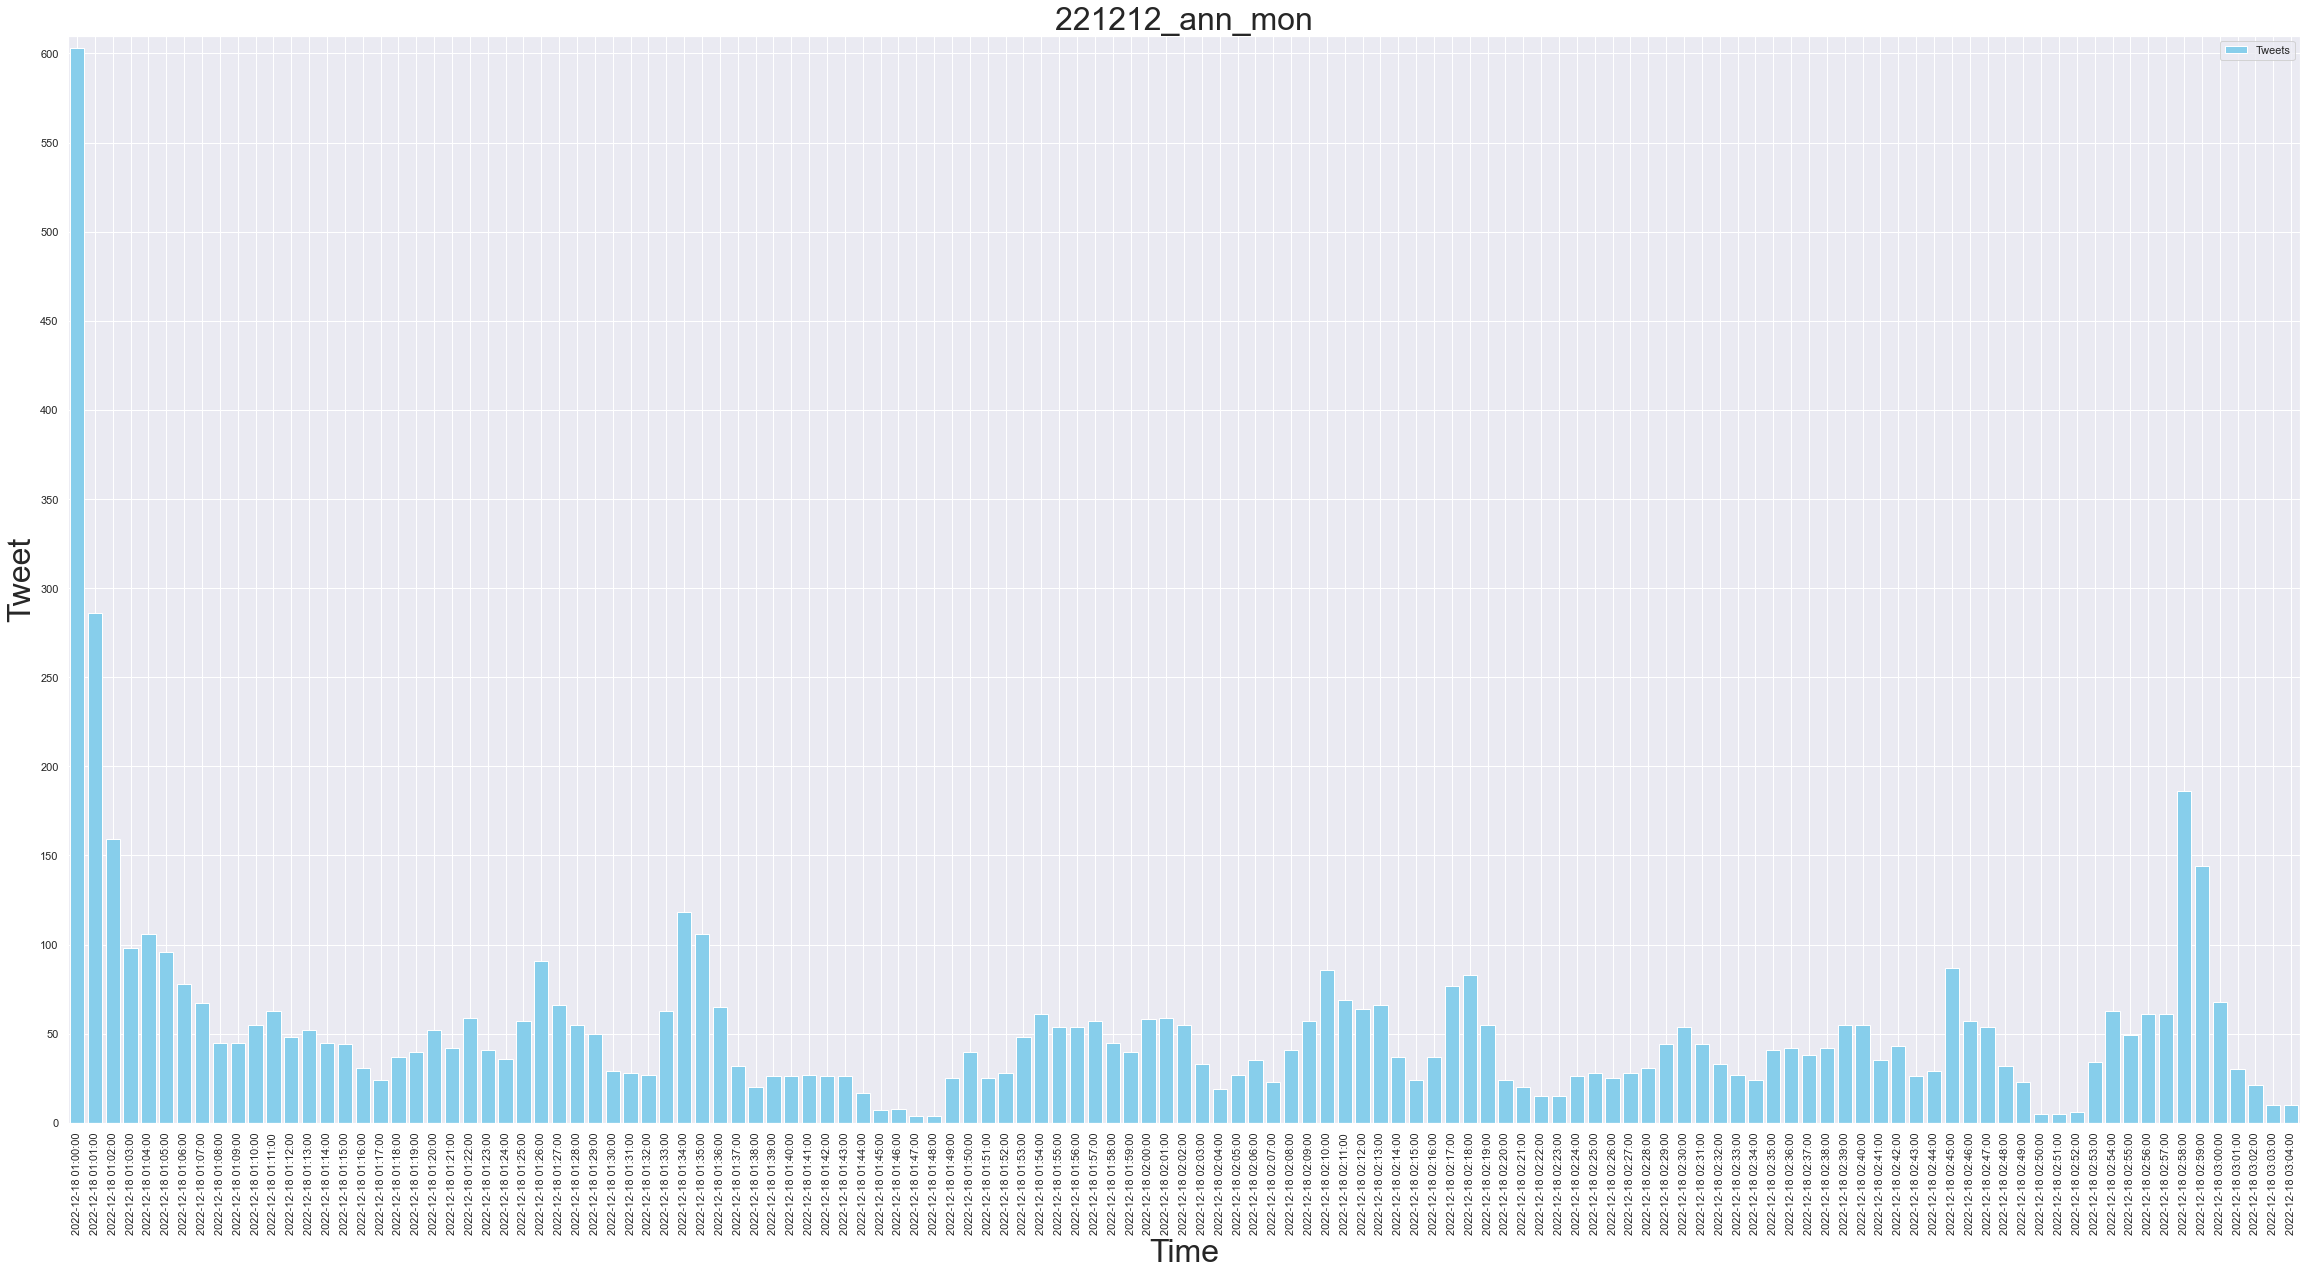

In [8]:
time = cnt['created_at']
tweets = cnt['counts']
fig = plt.figure(1, figsize=(40,20)) # 描画領域作成

c1,c2 = "skyblue", "black"
l1,l2 = "Tweets","Score"
axes = fig.add_subplot(111) # Axes作成
axes.set_xlabel("Time", fontsize = 32)
axes.set_ylabel("Tweet", fontsize = 32)
axes.bar(time, tweets, color=c1, label=l1)# 描画
axes.set_title("221212_ann_mon", fontsize = 32) # タイトル

# x軸
axes.tick_params(axis='x', rotation=90) # 軸目盛ラベルの回転
axes.set_xlim(-0.5, 124.5) # グラフの横幅と全体の端を揃える

# y軸
axes.set_ylim(0, 610) # y軸の範囲を指定する
start = 0
end = 610
stepsize = 50
axes.yaxis.set_ticks(np.arange(start, end, stepsize)) # y軸の間隔を指定する

axes.legend(loc=1)
# plt.savefig("thetrad220124.")